In [2]:
import pandas as pd
import quandl, datetime
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing, cross_validation, svm
from sklearn.metrics import mean_squared_error, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
# visualization
# get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = quandl.get('WIKI/GOOGL')



df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

print (df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [4]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
print(forecast_out)
print(df.tail(36))

35
            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2018-02-05     1068.76  4.325574   -2.893850    3742469.0  1006.94
2018-02-06     1084.43  0.272032    4.879205    3732527.0      NaN
2018-02-07     1055.41  2.948617   -2.724499    2544683.0      NaN
2018-02-08     1005.60  5.800517   -5.120439    3067173.0      NaN
2018-02-09     1043.43  0.794495    1.710726    4436032.0      NaN
2018-02-12     1054.56  1.044037   -0.199684    2796258.0      NaN
2018-02-13     1054.14  0.671638    0.394286    1574121.0      NaN
2018-02-14     1072.70  0.258227    1.743304    2029979.0      NaN
2018-02-15     1091.36  0.251063    0.730075    1806206.0      NaN
2018-02-16     1095.50  1.169329    0.193894    1971928.0      NaN
2018-02-20     1103.59  1.150790    0.991068    1646405.0      NaN
2018-02-21     1113.75  2.015713    0.419259    2024534.0      NaN
2018-02-22     1109.90  1.401928   -0.828292    1386115.0  

In [5]:
# dropping lable for features. have to. this is the training data.
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
print(X)
print('####before dropping nan####')
print(df.tail())
df.dropna(inplace=True)
print('####after dropping nan####')
print(df.tail())
y = np.array(df['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.1)
print(len(X), len(y))

[[-1.39187095  2.33516806  0.23254018  4.46712802]
 [-1.37635178 -0.31135438  4.81828847  1.8207495 ]
 [-1.37423066  2.35004252 -0.79917922  1.26561472]
 ...
 [ 2.99737935 -0.50090092  0.33301614 -0.61156746]
 [ 2.7553098   0.01505419 -0.46778619 -0.24489949]
 [ 2.55960556  2.87565464 -1.90605746 -0.49425191]]
####before dropping nan####
            Adj. Close    HL_PCT  PCT_change  Adj. Volume  label
Date                                                            
2018-03-21     1094.00  1.343693    0.130884    1990515.0    NaN
2018-03-22     1053.15  2.921711   -2.487014    3418154.0    NaN
2018-03-23     1026.55  3.918952   -2.360729    2413517.0    NaN
2018-03-26     1054.09  0.491419    0.332191    3272409.0    NaN
2018-03-27     1006.94  5.720301   -5.353887    2940957.0    NaN
####after dropping nan####
            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2018-01-30     1177.37  0.896914   -0.029718

In [6]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train) 
#fit is synonyms with train
#score/accuracy is synonyms with test
accuracy = clf.score(X_test, y_test)
clf2 = svm.SVR()
clf2.fit(X_train, y_train)
accuracy2 = clf2.score(X_test, y_test)

In [7]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy2, forecast_out)

[1100.57520863 1071.97418954 1018.96812286 1059.90923709 1072.30590876
 1072.48076484 1090.91615957 1110.33024034 1113.49175949 1121.37636742
 1130.62835247 1128.41190166 1147.72691859 1163.33078622 1135.26710109
 1121.43436535 1087.36249772 1101.93106735 1113.01910806 1120.34580931
 1133.83230774 1148.67529231 1180.04433852 1184.68247063 1156.79214116
 1167.57013243 1169.41299486 1152.4544188  1117.85569394 1114.1460089
 1111.7713027  1069.32429185 1041.42938161 1072.14665043 1020.58685642] 0.8200404196643916 35


In [8]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [9]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] +[i]

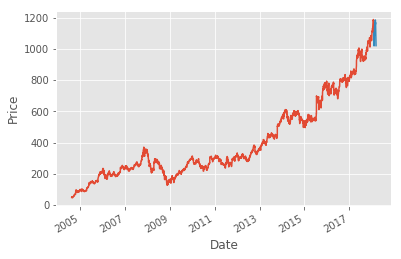

In [10]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()